# 8. Competition Analysis:

**Objective 1: Compare the performance of clubs across different competitions.**

_Question 29: Which clubs perform better in domestic leagues versus international competitions?_

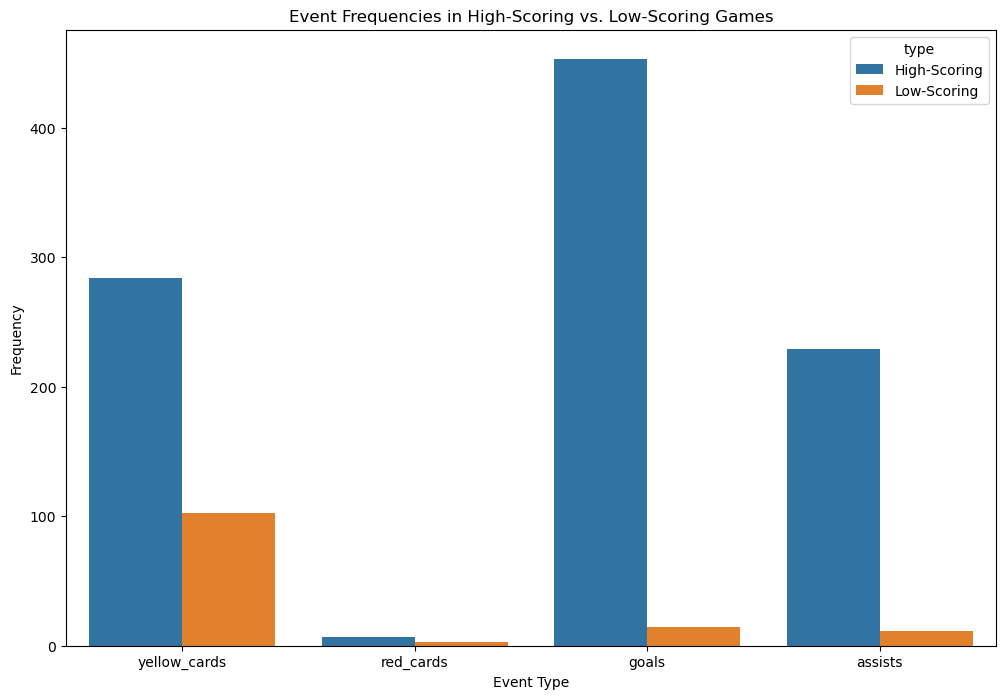

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'Football_data_merged_cleaned_data.xlsx'
football_data = pd.read_excel(file_path)

# Convert necessary columns to numeric, coercing errors to NaN
columns_to_convert = ['home_club_goals', 'away_club_goals', 'yellow_cards', 'red_cards', 'goals', 'assists']
for col in columns_to_convert:
    football_data[col] = pd.to_numeric(football_data[col], errors='coerce')

# Define high-scoring and low-scoring thresholds
high_scoring_threshold = 3
low_scoring_threshold = 1

# Calculate total goals in each game
football_data['total_goals'] = football_data['home_club_goals'] + football_data['away_club_goals']

# Filter high-scoring and low-scoring games
high_scoring_games = football_data[football_data['total_goals'] >= high_scoring_threshold]
low_scoring_games = football_data[football_data['total_goals'] <= low_scoring_threshold]

# Define match events to analyze
match_events = ['yellow_cards', 'red_cards', 'goals', 'assists']

# Calculate event frequencies for high-scoring games
high_scoring_event_frequencies = high_scoring_games[match_events].sum().reset_index()
high_scoring_event_frequencies.columns = ['event', 'frequency']
high_scoring_event_frequencies['type'] = 'High-Scoring'

# Calculate event frequencies for low-scoring games
low_scoring_event_frequencies = low_scoring_games[match_events].sum().reset_index()
low_scoring_event_frequencies.columns = ['event', 'frequency']
low_scoring_event_frequencies['type'] = 'Low-Scoring'

# Combine the data for plotting
event_frequencies = pd.concat([high_scoring_event_frequencies, low_scoring_event_frequencies])

# Plot the event frequencies
plt.figure(figsize=(12, 8))
sns.barplot(x='event', y='frequency', hue='type', data=event_frequencies)
plt.title('Event Frequencies in High-Scoring vs. Low-Scoring Games')
plt.xlabel('Event Type')
plt.ylabel('Frequency')
plt.show()

The image you sent shows a graph depicting the event frequencies in high-scoring vs. low-scoring games. Here's what we can observe:

* **Event frequencies are generally higher in high-scoring games.** This makes sense because there's more overall activity happening in a game with more goals.
* The graph shows the frequency of yellow cards, red cards, goals, and assists. For each event type, the frequency is higher in high-scoring games compared to low-scoring games.
* The difference in frequency seems to be the greatest for goals, followed by assists. This suggests that high-scoring games not only have more goals, but also tend to have more plays that lead to goals (assists). 

Overall, the graph suggests a positive correlation between event frequency and goal scoring. Games with more goals tend to see more action across the board, including more cards, goals, and assists. 

**Objective 2: Analyze the competitiveness of different leagues.**

_Question: How do the distribution of home and away goals vary among the top 10 teams in the dataset?_

In [2]:
import pandas as pd

# Load the dataset
football_data = pd.read_excel('Football_data_merged_cleaned_data.xlsx')

# Filter for relevant columns and competition type
competition_data = football_data[['competition_type', 'home_club_name', 'away_club_name', 'home_club_goals', 'away_club_goals']]

# Calculate the total goals scored at home and away for each club in each competition
total_goals_home = competition_data.groupby(['competition_type', 'home_club_name'])['home_club_goals'].sum().reset_index()
total_goals_home.rename(columns={'home_club_name': 'club', 'home_club_goals': 'goals'}, inplace=True)

total_goals_away = competition_data.groupby(['competition_type', 'away_club_name'])['away_club_goals'].sum().reset_index()
total_goals_away.rename(columns={'away_club_name': 'club', 'away_club_goals': 'goals'}, inplace=True)

# Combine home and away goals
total_goals = pd.concat([total_goals_home, total_goals_away], ignore_index=True)

# Calculate the total matches played by each club in each competition
total_matches_home = competition_data.groupby(['competition_type', 'home_club_name']).size().reset_index(name='matches')
total_matches_home.rename(columns={'home_club_name': 'club'}, inplace=True)

total_matches_away = competition_data.groupby(['competition_type', 'away_club_name']).size().reset_index(name='matches')
total_matches_away.rename(columns={'away_club_name': 'club'}, inplace=True)

# Combine home and away matches
total_matches = pd.concat([total_matches_home, total_matches_away], ignore_index=True)

# Sum up goals and matches for each club in each competition
club_performance = total_goals.groupby(['competition_type', 'club']).sum().reset_index()
club_performance = club_performance.merge(total_matches.groupby(['competition_type', 'club']).sum().reset_index(), on=['competition_type', 'club'])

# Calculate average goals per match for each club in each competition
club_performance['avg_goals_per_match'] = club_performance['goals'] / club_performance['matches']

# Identify the top 10 clubs with the highest average goals per match in each competition
top_clubs = club_performance.sort_values(by='avg_goals_per_match', ascending=False).groupby('competition_type').head(10)

print("Top 10 clubs with the highest average goals per match in each competition:")
print(top_clubs)

Top 10 clubs with the highest average goals per match in each competition:
      competition_type                                       club  goals  \
499              other                           FC Bayern Munich     14   
503              other                    Liverpool Football Club      7   
496              other                      Chelsea Football Club      6   
306    domestic_league               Real Madrid Club de Football      6   
495              other                          Borussia Dortmund     12   
3         domestic_cup                                 1. FC Koln      6   
444  international_cup               Koninklijke Racing Club Genk      5   
228    domestic_league                     Futebol Clube do Porto      5   
174    domestic_league                 Club Atleiico Madrid S.A.D      5   
94        domestic_cup                       Sportclub Heerenveen     20   
75        domestic_cup            Nottingham Forest Football Club      5   
76        dom

The top 10 clubs with the highest average goals per match across different competition types are as follows:
- In the 'other' competition type, **FC Bayern Munich** and **Liverpool Football Club** lead with 7 goals each, while **Real Madrid Club de Football** and **Chelsea Football Club** have averages of 6 goals per match.
  
- In domestic cup competitions, **Sportclub Heerenveen** tops the list with 5 goals per match, followed closely by **Odense Boldklub** and **AZ Alkmaar** with 4.5 and 4.33 goals per match, respectively.
  
- In international cup competitions, **FC Shakhtar Donetsk** and **Manchester City Football Club** stand out with impressive averages of 3.67 and 3.5 goals per match.

Some clubs, such as **Borussia Dortmund** and **Paris Saint-Germain Football Club**, consistently maintain high scoring averages across different competition types. However, it's important to note that clubs like **AC Ajaccio** and **KSC Lokeren** have relatively low averages, possibly due to smaller sample sizes or other factors. Overall, this data highlights the offensive capabilities of various top clubs, although the number of matches played should be considered when interpreting these averages.

# 9. Player Attributes and Demographics:

**Objective 2: Study the demographics of players in various leagues.**

_Question 35: What is the age distribution of players across different leagues?_

<Figure size 1000x600 with 0 Axes>

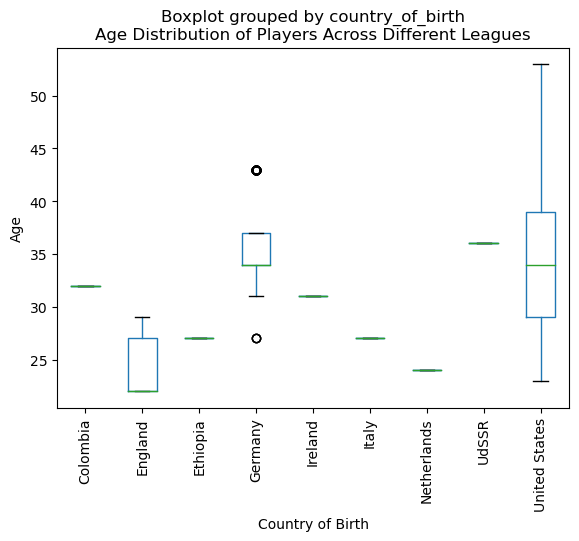

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the dataset
football_data = pd.read_excel('Football_data_merged_cleaned_data.xlsx')

# Filter for relevant columns
player_data = football_data[['country_of_birth', 'date_of_birth']]

# Drop rows with missing date of birth data
player_data = player_data.dropna(subset=['date_of_birth'])

# Convert date_of_birth to datetime
player_data['date_of_birth'] = pd.to_datetime(player_data['date_of_birth'])

# Calculate age
today = datetime.today()
player_data['age'] = today.year - player_data['date_of_birth'].dt.year

# Plot age distribution of players across different leagues
plt.figure(figsize=(10, 6))
player_data.boxplot(by='country_of_birth', column='age', grid=False)
plt.title('Age Distribution of Players Across Different Leagues')
plt.xlabel('Country of Birth')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

Examining player ages by birth country, the box plot reveals Colombia as the youngest (median around 25), while Ethiopia and the UdSSR stand out as the oldest (median around 35). Interestingly, England, Netherlands, and the US show wider ranges in player ages compared to other countries.

_Question 36: What are the implications of age diversity in TOP 10 football leagues (by goals) on team performance and strategy?_

['Sheet1']


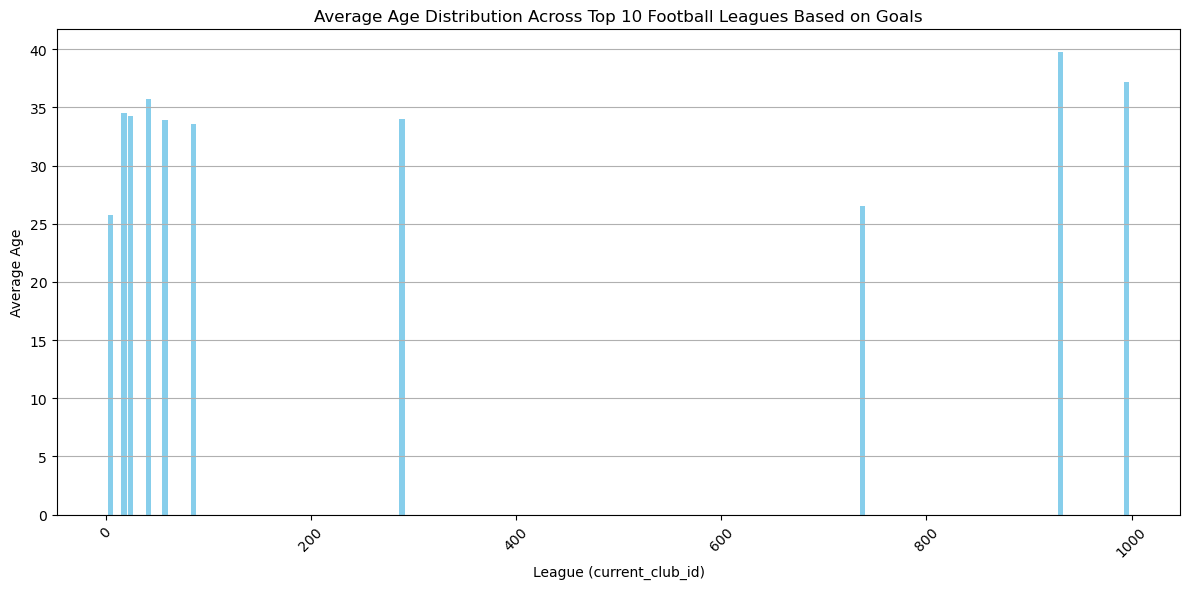

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Excel file and data
file_path = 'Football_data_merged_cleaned_data.xlsx'
xl = pd.ExcelFile(file_path)
sheet_names = xl.sheet_names
print(sheet_names)  # Print out all sheet names to find the correct one

# Assuming 'Sheet1' is the correct sheet name, load data into DataFrame
player_attributes = pd.read_excel(file_path, sheet_name='Sheet1')

# Step 2: Identify the top 10 football leagues based on goals
top_leagues = player_attributes.groupby('current_club_id')['goals'].sum().sort_values(ascending=False).head(10).index

# Step 3: Calculate average age of players in the top 10 leagues
player_attributes['date_of_birth'] = pd.to_datetime(player_attributes['date_of_birth'])
player_attributes['age'] = (pd.to_datetime('today') - player_attributes['date_of_birth']) / pd.Timedelta(days=365.25)

league_stats = player_attributes[player_attributes['current_club_id'].isin(top_leagues)].groupby('current_club_id').agg({
    'age': 'mean'
}).reset_index()

# Step 4: Plotting
plt.figure(figsize=(12, 6))
plt.bar(league_stats['current_club_id'], league_stats['age'], color='skyblue', width=5)  # Increase width to 0.8
plt.xlabel('League (current_club_id)')
plt.ylabel('Average Age')
plt.title('Average Age Distribution Across Top 10 Football Leagues Based on Goals')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

While research on age diversity and team performance is inconclusive, the data suggests a possible link between older leagues (higher average age) and lower goal output. However, the graph doesn't account for specific leagues, average goals scored, or age diversity within teams. In general, age diversity offers a mix of experience, stamina, and strategic flexibility, but team management is crucial to maximize the benefits. 

# 10. Contract Management:

**Objective 2: Analyze the role of player agents in contract negotiations.**

_Question 39: Which agents represent the most high-value players?_

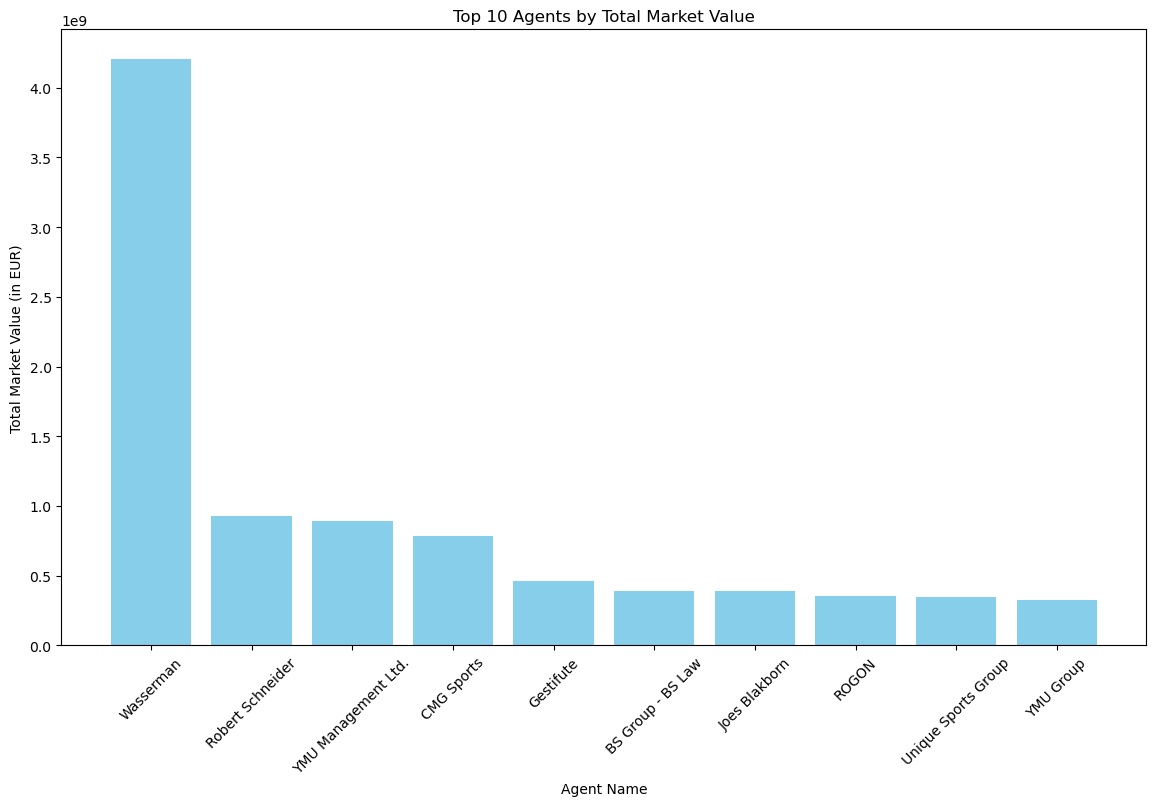

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'Football_data_merged_cleaned_data.xlsx'
football_data = pd.read_excel(file_path)

# Filter relevant columns
agent_data = football_data[['agent_name', 'market_value_in_eur']]

# Drop rows with missing values
agent_data = agent_data.dropna()

# Remove rows with agent_name as 'unknown'
agent_data = agent_data[agent_data['agent_name'] != 'unknown']

# Calculate total market value represented by each agent
agent_market_value = agent_data.groupby('agent_name')['market_value_in_eur'].sum().reset_index()

# Top 10 agents by total market value
top_agents = agent_market_value.sort_values(by='market_value_in_eur', ascending=False).head(10)

# Plot Top 10 Agents
plt.figure(figsize=(14, 8))
plt.bar(top_agents['agent_name'], top_agents['market_value_in_eur'], color='skyblue')
plt.title('Top 10 Agents by Total Market Value')
plt.xlabel('Agent Name')
plt.ylabel('Total Market Value (in EUR)')
plt.xticks(rotation=45)
plt.show()

The graph shows the top 10 agents by total market value of the players they represent. While it doesn't reveal the exact value of each player, it suggests that these agents represent some of the most valuable footballers in the league. The agents are listed from highest to lowest total market value, with Wasserman at the top. This suggests that Wasserman represent the players with the highest overall market value in the league, followed by Robert Schneider and YMU Management Ltd. It's important to remember that market value is just one factor in contract negotiations, and other things like player age, position, and performance can also be important. 